In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
df = pd.read_csv("datos/salida.csv")

In [60]:
df

,UniProtID,Largo,Secuencia
0,P52756,815.0,MGSDKRVSRTERSGRYGSIIDRDDRDERESRSRRRDSDYKRSSDDR...
1,P78332,1123.0,MWGDSRPANRTGPFRGSQEERFAPGWNRDYPPPPLKSHAQERHSGN...
2,Q96IC2,774.0,MEPEREGTERHPRKVRESRQAPNKLVGAAEAMKAGWDLEESQPEAK...
3,Q9Y2T7,364.0,MSEVEAAAGATAVPAATVPATAAGVVAVVVPVPAGEPQKGGGAGGG...
4,O75534,798.0,MSFDPNLLHNNGHNGYPNGTSAALRETGVIEKLLTSYGFIQCSERQ...
...,...,...,...
1055,Q99973,2627.0,MEKLHGHVSAHPDILSLENRCLAMLPDLQPLEKLHQHVSTHSDILS...
1056,Q27274,643.0,MADELNEFQEAGNFNEEALMRLSNVCARLRRMQMLESDVEITVVDG...
1057,P04406,335.0,MGKVKVGVNGFGRIGRLVTRAAFNSGKVDIVAINDPFIDLNYMVYM...
1058,Q9IBD0,501.0,MNGSLDHPDQPDIDSIKMFVGQIPRTWSEDQLRELFEPYGAVYEIN...


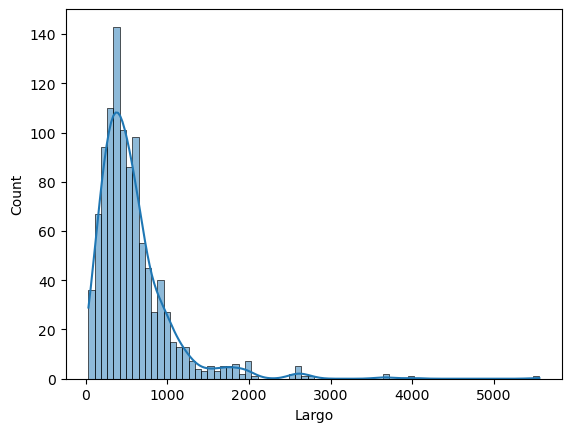

In [75]:
sns.histplot(data=df, x="Largo", kde=True)
plt.show()

In [84]:
df["Largo"].describe()

count    1031.000000
mean      577.871969
std       468.474534
min        33.000000
25%       303.500000
50%       471.000000
75%       696.000000
max      5560.000000
Name: Largo, dtype: float64

In [77]:
head = ["id",
        "annotId",
        "createDate",
        "updateDate",
        "geneName",
        "geneDesc",
        "species",
        "taxID",
        "domains",
        "flag",
        "flagNote",
        "aliases",
        "GSTpaper",
        "PDBIDs",
        "UniProtIDs"
        ]

df2 = pd.read_csv('datos/Proteinas.csv', header=None, names=head)

In [78]:
resultado = pd.merge(df, df2[["UniProtIDs", "taxID"]], left_on='UniProtID', right_on='UniProtIDs', how='inner')

In [79]:
resultado.keys()

Index(['UniProtID', 'Largo', 'Secuencia', 'UniProtIDs', 'taxID'], dtype='object')

In [80]:
resultado.drop("UniProtIDs", axis=1, inplace=True)

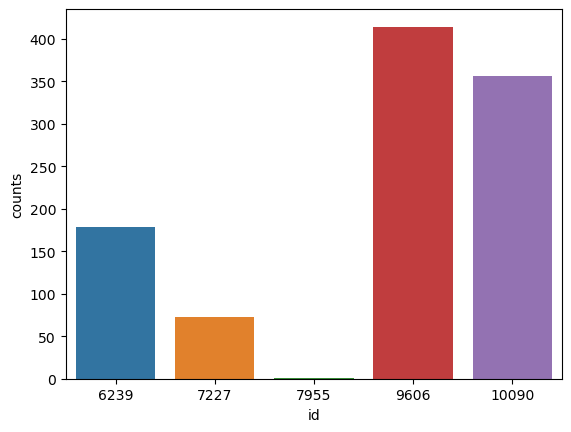

In [81]:
counts = resultado["taxID"].value_counts().rename_axis('id').to_frame('counts')
counts.reset_index(level=0, inplace=True)

counts = counts.sort_values(by='counts')

sns.barplot(counts, x="id", y="counts")

plt.show()